# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# 결정트리 이란?

결정트리 알고리즘은 규칙에 따라 데이터를 분류하는 모습이 마치 나무가 줄기를 뻗는 모습과 비슷하여 Tree 라는 이름이 붙여진 알고리즘이다.

결정트리 알고리즘은 처음 시작 점인 Root node에서 시작하여 중간의 Child node를 지나 최종 노드인 leaf node 까지 데이터를 분류하는 알고리즘이다.

따라서 규칙에 따라 최종적으로 분류되어 leaf node에 위치한 데이터들이 총합은 Root node에 시작된 데이터의 수와 일치하다.

그렇다면 결정트리 알고리즘은 어떤 규칙을 가지고 데이터를 분류할까? 바로 불순도이다. 여기서 불순도란 데이터 내부에 얼마나 동일한 데이터로 이루어져 있느냐를 의미하며 불순도를 측정하는 지표로는 Entropy와 Gini Impurity가 있다. 불순도가 낮을 수록 데이터가 균일하다는 의미이며 따라서 불순도가 가장 낮은 방향 즉 가장 낮은 엔트로피와 Gini 계수 값을 가지는 규칙을 우선으로 하여 데이터를 분류해 나간다. 두 지표 모두 데이터를 분리하는 기준을 측정하는 방법이 크게 다르지 않기 때문에 어떠한 지표를 쓰더라도 동일한 기준을 가진다. 하지만 sklearn의 DicisionTree 알고리즘은 기본적으로 Gini Impurity를 기준으로 불순도를 측정하고 그 값을 기준으로 데이터를 분리한다.

또한 sklearn의 DicisionTree 알고리즘은 이진 트리 즉 하나의 부모 노드에서 2개의 자식 노드만늘 분류하는 CART 알고리즘을 사용하기 때문에 분류뿐 아니라 회귀에도 활용이 가능하며 그 성능 또한 우수하다고 말할 수 있다.

그리고 가장 중요한 점은 대부분의 앞으로 배울 성능이 좋은 Ensemble, Deep Learning 같은 모델들은 데이터가 어떻게 예측이 되었는지 쉽게 추론할 수 없는 블랙박스 모델인 반면  DicisionTree 알고리즘은 데이터가 어떻게 분류되었는지 직관적이고 쉽게 예측할 수 있는 화이트박스 모델인 점에서 의사결정자들에게 쉽게 설명할 수 있으며 설명력이 매우 높은 알고리즘이라고 할 수 있다.

하지만 DicisionTree 알고리즘은 성능은 좋지만 머신러닝에서 가장 조심 해야하는 과적합이 쉽게 발생한다는 단점을 가진다. 이러한 단점을 가지는 이유는 DicisionTree 알고리즘 자체가 불순도가 낮은 방향으로 계속해서 데이터를 분리하기 때문에 매우 많은 규칙을 활용한다면 모든 학습 데이터를 최종 노드까지 분류할 수 있을 것이다. 하지만 이렇게 학습된 모델은 학습 데이터에만 너무 치중한 나머지 괴적합이 되었다고 말할 수 있으며 테스트 데이터 및 우리가 앞으로 예측할 데이터에 대하여 제대로 예측할 수 없을 것이며 그 성능 또한 매우 낮을 것이다. 따라서 DicisionTree 알고리즘은 과적합이 쉽게 발생한다는 매우 큰 단점을 가진다.

따라서 우리는 DicisionTree 알고리즘의 과적합 문제를 해소하기 위해서 하이퍼파리미터 튜닝을 진행해야 한다.

### DicisionTree의 주요 파라미터

- 'max_depth' : 트리의 최대 깊이를 규정
- 'min_samples_split' : 노드를 분활하기 위한 최소한의 샘플 수 
- 'min_samples_leaf' : 말단 노드가 되기 위한 최소한의 샘플 수
- 'max_features' : 최적의 분할을 위해 고려할 최대 피쳐 개수
- 'max_leaf_nodes' : 말단 노드의 최대 개수
- 'random_state' : seed 값 설정 

위의 파리미터를 수정하여 과적합을 줄여야 하며 가장 이상적인 DicisionTree는 매우 높은 성능을 보이지만 매우 단순한 규칙으로 학습된 SImple한 일반화된 Model이다.

# 결정트리 실습

아이리스 데이터를 가지고 결정트리 알고리즘이 어떻게 학습하고 왜 과적합이 쉽게 일어나는지 알아볼 예정이다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

iris_data = load_iris()

X = iris_data.data # 학습할 데이터
y = iris_data.target # 타겟

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify = y)

## 기본 값으로 만든 모델

In [ ]:
params = {
    'max_depth' : None, 
    'min_samples_split' : 2, 
    'min_samples_leaf' : 1, 
    'max_features' : None, 
    'max_leaf_nodes' : None, 
    'random_state' : 22
    }

In [ ]:
dt_clf = DecisionTreeClassifier(**params)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(f"Accuracy: {score:0.4f}")

Accuracy: 0.9333


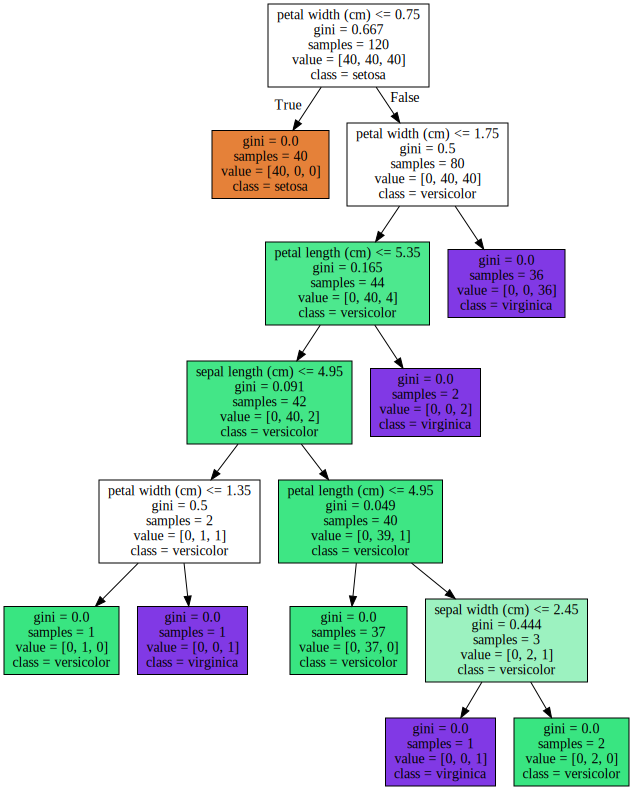

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(dt_clf, class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True))

기본적으로 결정트리 알고리즘은 위와 같이 가장 낮은 지니 값을 가지는 기준으로 데이터를 두개의 노드로 분류한다는 것을 알 수 있다.

## max_depth를 조정

In [ ]:
params = {
    'max_depth' : 3, 
    'min_samples_split' : 2, 
    'min_samples_leaf' : 1, 
    'max_features' : None, 
    'max_leaf_nodes' : None, 
    'random_state' : 22 
    }

In [ ]:
dt_clf = DecisionTreeClassifier(**params)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(f"Accuracy: {score:0.4f}")

Accuracy: 0.9333


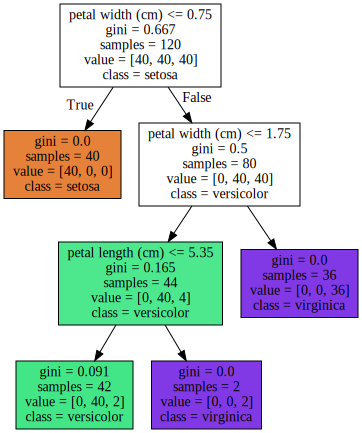

In [ ]:
graphviz.Source(export_graphviz(dt_clf, class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True))

max_depth를 3으로 조정하여 최대 트리 깊이가 3개로 나온 것을 알 수 있다.

## min_samples_split를 조정

In [ ]:
params = {
    'max_depth' : None, 
    'min_samples_split' : 4, 
    'min_samples_leaf' : 1, 
    'max_features' : None, 
    'max_leaf_nodes' : None, 
    'random_state' : 22 
    }

In [ ]:
dt_clf = DecisionTreeClassifier(**params)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(f"Accuracy: {score:0.4f}")

Accuracy: 0.9333


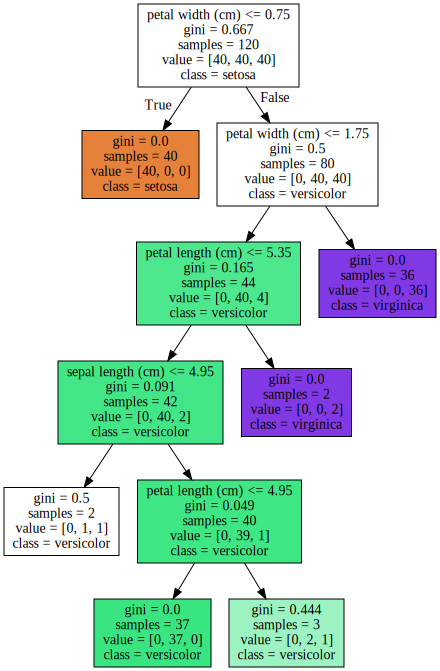

In [ ]:
graphviz.Source(export_graphviz(dt_clf, class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True))

## min_samples_leaf를 조정

In [ ]:
params = {
    'max_depth' : None, 
    'min_samples_split' : 2, 
    'min_samples_leaf' : 4, 
    'max_features' : None, 
    'max_leaf_nodes' : None, 
    'random_state' : 22 
    }

In [ ]:
dt_clf = DecisionTreeClassifier(**params)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(f"Accuracy: {score:0.4f}")

Accuracy: 0.9667


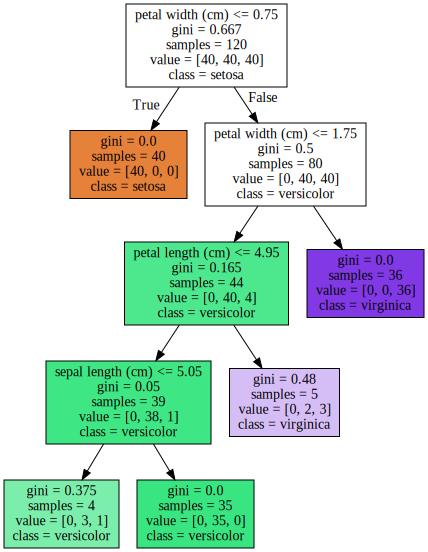

In [ ]:
graphviz.Source(export_graphviz(dt_clf, class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True))

## 중요 픽쳐를 시각화

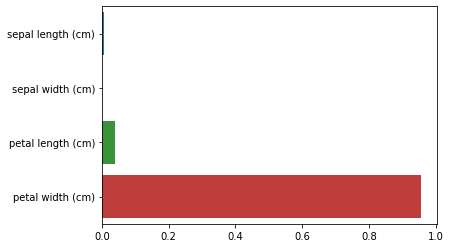

In [ ]:
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

결정트리 알고리즘은 위와 같이 데이터를 분할했을 때 가장 중요한 픽쳐를 찾아 그래프로 나타낼 수 있다.

## 결정 트리의 과적합(Overfitting)

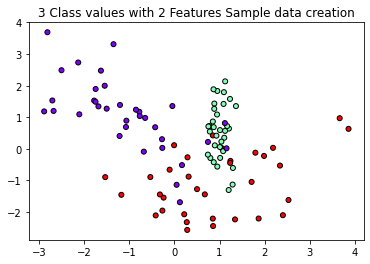

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# feature이 2개라는 가정하에 만들기 때문에 2차원 그래프로 나타낼 수 있음

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

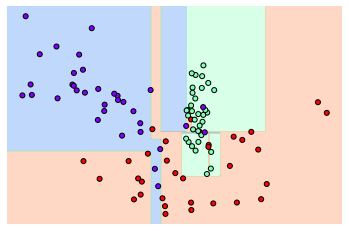

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

데이터를 너무 세분하게 나누어 모델이 과적합이 되었다는 것을 일 수 있다.

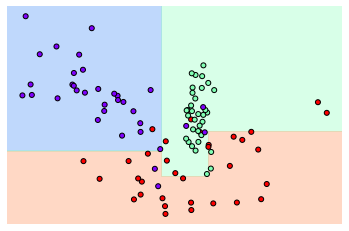

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

하이퍼 파라미터를 튜닝하여 과적합을 해결한 일반화된 모델이 되었다는 것을 알 수 있다.

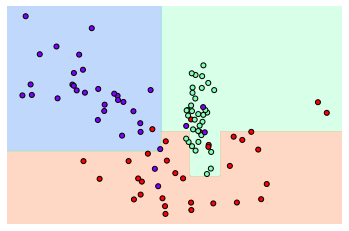

In [ ]:
# min_samples_leaf=5 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=5).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

아까 보다 더 잘 일반화된 모델이 되었다는 것을 알 수 있다. 이렇듯 결정트리에서는 하이퍼 파라미터 튜닝이 매우 중요하게 작용한다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/